In [29]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.decomposition import PCA


# PCA

In [30]:
# Load the image from a file
image_path = 'images/camel.jpg'  # image path
image = imread(image_path)


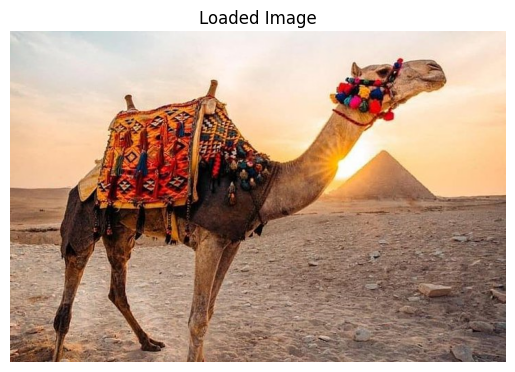

In [31]:
# Display the loaded image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.title('Loaded Image')
plt.show()

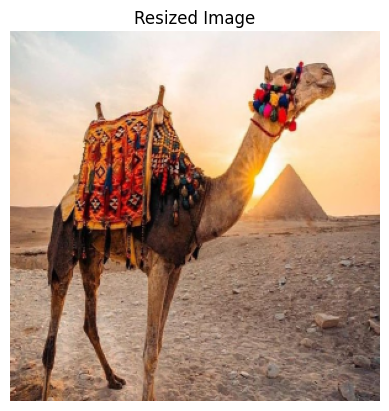

In [32]:
# Preprocess the image: resizing to a smaller size to reduce complexity
# The new size can be chosen to be smaller to speed up PCA calculations
image_resized = resize(image, (300, 300), anti_aliasing=True)

# Display the resized image
plt.imshow(image_resized)
plt.axis('off')  # Hide the axis
plt.title('Resized Image')
plt.show()

In [33]:
# Reshape the image data into a 2D array where each row is a pixel and the columns are the RGB color channels
image_reshaped = image_resized.reshape(-1, 3)  # for RGB images, we have 3 channels


In [34]:
# Set the number of PCA components to be less than or equal to the number of features (RGB channels)
pca_components = 3  # We cannot have more components than features

# Apply PCA for dimensionality reduction
pca = PCA(n_components=pca_components)
image_pca = pca.fit_transform(image_reshaped)

# The shape of image_pca gives us the reduced dimensionality of our image data
print(f"Reduced image shape: {image_pca.shape}")


Reduced image shape: (90000, 3)


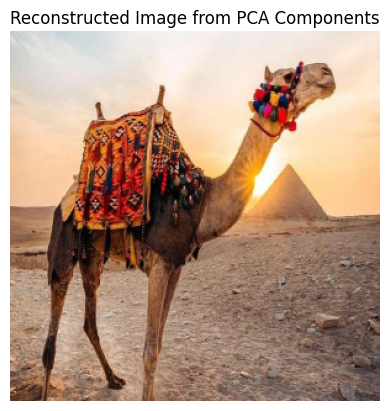

In [35]:
# Reconstruct the image from the PCA components
image_reconstructed = pca.inverse_transform(image_pca).reshape(image_resized.shape)

# Display the reconstructed image
plt.imshow(image_reconstructed)
plt.axis('off')  # Hide the axis
plt.title('Reconstructed Image from PCA Components')
plt.show()


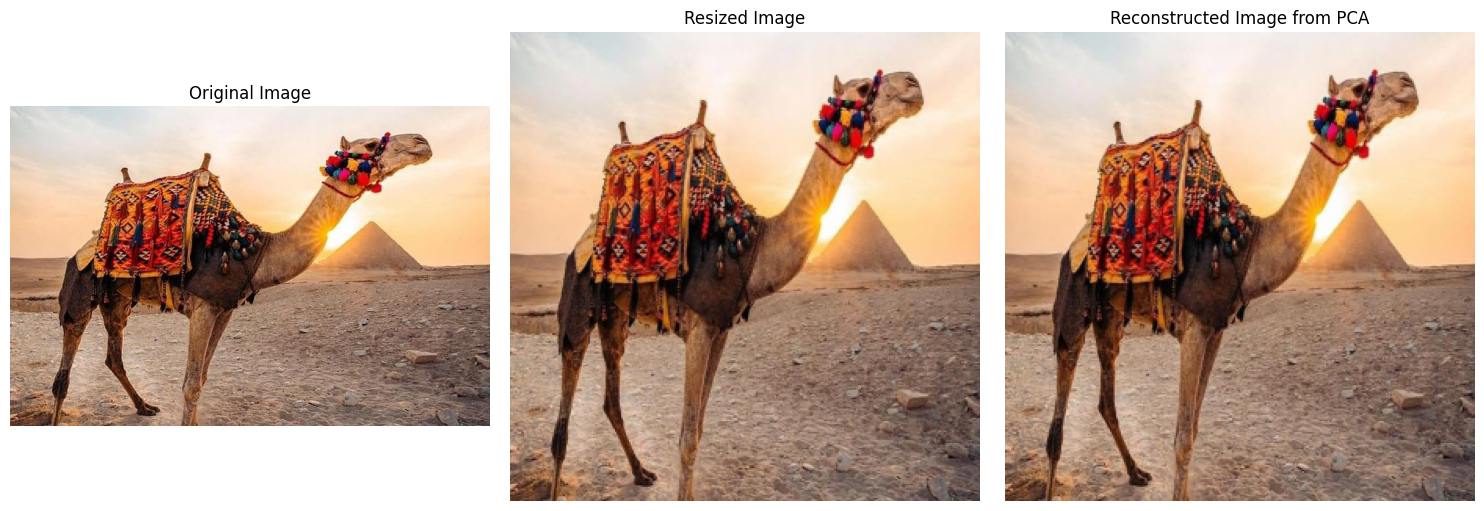

In [36]:
# Plot the original, resized, and reconstructed images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Resized image
axes[1].imshow(image_resized)
axes[1].set_title('Resized Image')
axes[1].axis('off')

# Reconstructed image from PCA
axes[2].imshow(image_reconstructed)
axes[2].set_title('Reconstructed Image from PCA')
axes[2].axis('off')

plt.tight_layout()
plt.show()


In [37]:
def calculate_image_size(image_array):
    # Calculate the size of the image in bytes
    image_size_bytes = image_array.nbytes
    # Convert sizes to kilobytes (KB) and megabytes (MB)
    image_size_kb = image_size_bytes / 1024
    image_size_mb = image_size_kb / 1024
    return image_size_kb, image_size_mb

reconstructed_size_kb, reconstructed_size_mb = calculate_image_size(image_reconstructed)

# Print sizes
print(f"Reconstructed image size: {reconstructed_size_kb:.2f} KB or {reconstructed_size_mb:.2f} MB")


Reconstructed image size: 2109.38 KB or 2.06 MB


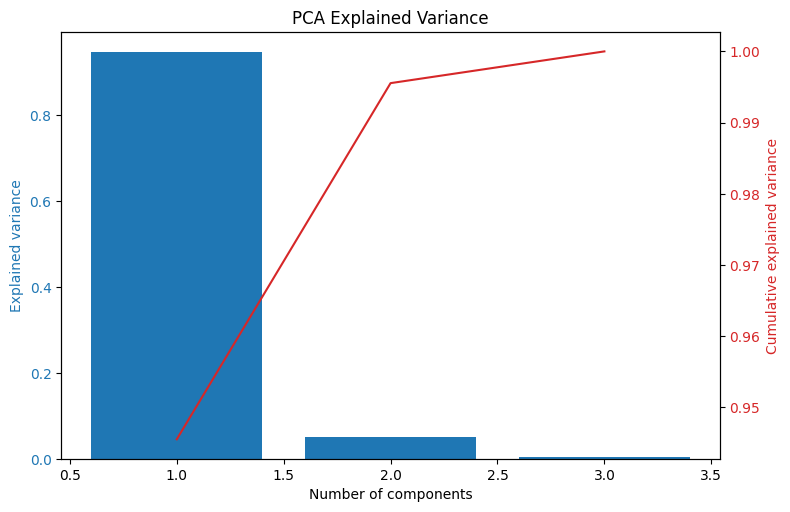

In [38]:
# Explained variance ratio of the PCA components
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance shows the total amount of variance captured as we keep adding components
cumulative_explained_variance = np.cumsum(explained_variance)

# Plotting the explained variance and the cumulative explained variance
fig, ax1 = plt.subplots(figsize=(8, 5))

color = 'tab:blue'
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Explained variance', color=color)
ax1.bar(range(1, len(explained_variance) + 1), explained_variance, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Cumulative explained variance', color=color)
ax2.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # To ensure the right y-label is not slightly clipped
plt.title('PCA Explained Variance')
plt.show()


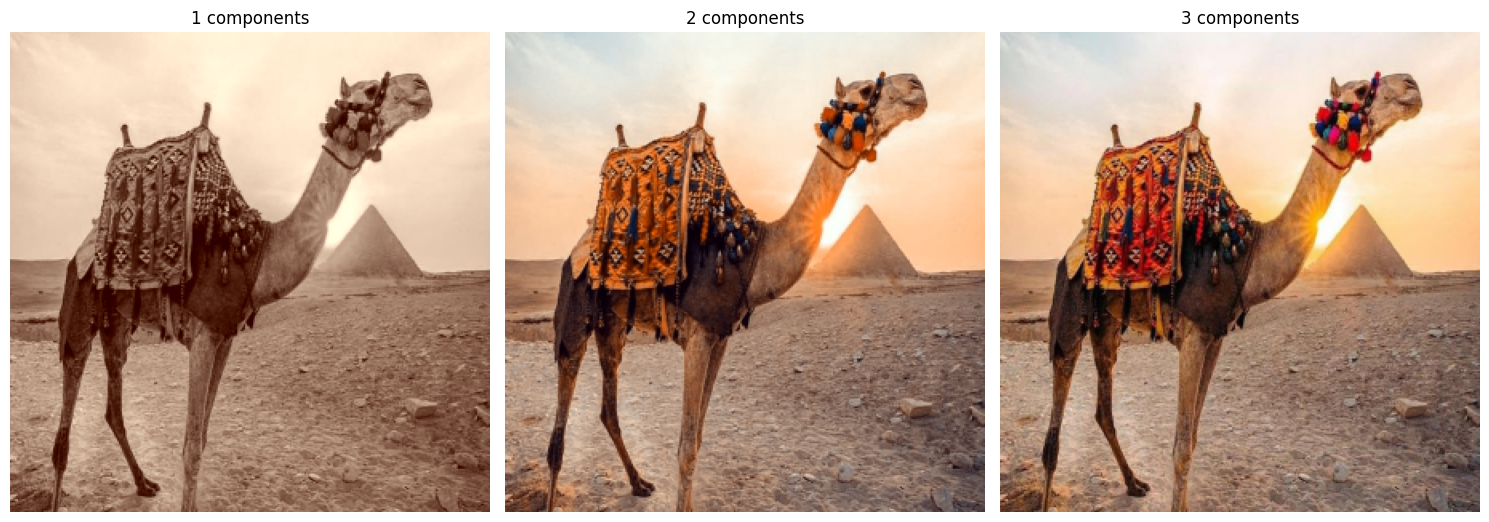

In [39]:
# Function to apply PCA and reconstruct the image given a number of components
def apply_pca_and_reconstruct(n_components, image_data):
    pca = PCA(n_components=n_components)
    image_pca = pca.fit_transform(image_data)
    image_reconstructed = pca.inverse_transform(image_pca).reshape(image_resized.shape)
    return image_reconstructed

# Define a list of different numbers of components to try
components_list = [1, 2,3]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 10))
axes = axes.ravel()

for i, n_components in enumerate(components_list):
    # Reconstruct the image using the specified number of components
    reconstructed_image = apply_pca_and_reconstruct(n_components, image_reshaped)

    # Plot the reconstructed image
    axes[i].imshow(reconstructed_image)
    axes[i].set_title(f'{n_components} components')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# KMeans Colors

In [40]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

# Load the image
image2_path = 'images/cairo.jpg'  # Replace with the path to your image
image2 = imread(image2_path)
image2.shape

(2845, 4122, 3)

In [41]:

# Resize the image to make it quicker for K-Means to run
# You can skip resizing if the image is already small or if computation time is not an issue
image_resized = resize(image2, (300, 300), anti_aliasing=True)
image_resized.shape


(300, 300, 3)

In [42]:

# Reshape the image to be a list of pixels
pixels = image_resized.reshape(-1, 3)
pixels.shape


(90000, 3)

In [43]:
# Convert the list of pixels into a set to remove duplicates, then count the elements
unique_colors = np.unique(pixels, axis=0)
num_unique_colors = len(unique_colors)
print(f"The original image has {num_unique_colors} unique colors.")


The original image has 89408 unique colors.


In [44]:
# Function to apply K-Means and reconstruct the image with the specified number of colors
def kmeans_reconstruct(image_pixels, n_colors):
    # Apply K-Means clustering to the image pixels
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    kmeans.fit(image_pixels)

    # Assign each pixel to the nearest cluster center
    compressed_pixels = kmeans.predict(image_pixels)

    # Replace each pixel's color with the color of the cluster center
    compressed_image = kmeans.cluster_centers_[compressed_pixels]

    # Return the reconstructed image in its original shape
    return compressed_image.reshape(image_resized.shape)


In [45]:
# List of desired numbers of colors
colors_list = [2,8,64,256]

# Dictionary to hold the reconstructed images
reconstructed_images = {}

# Apply K-Means and reconstruct images with the specified number of colors
for n_colors in colors_list:
    reconstructed_images[n_colors] = kmeans_reconstruct(pixels, n_colors)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


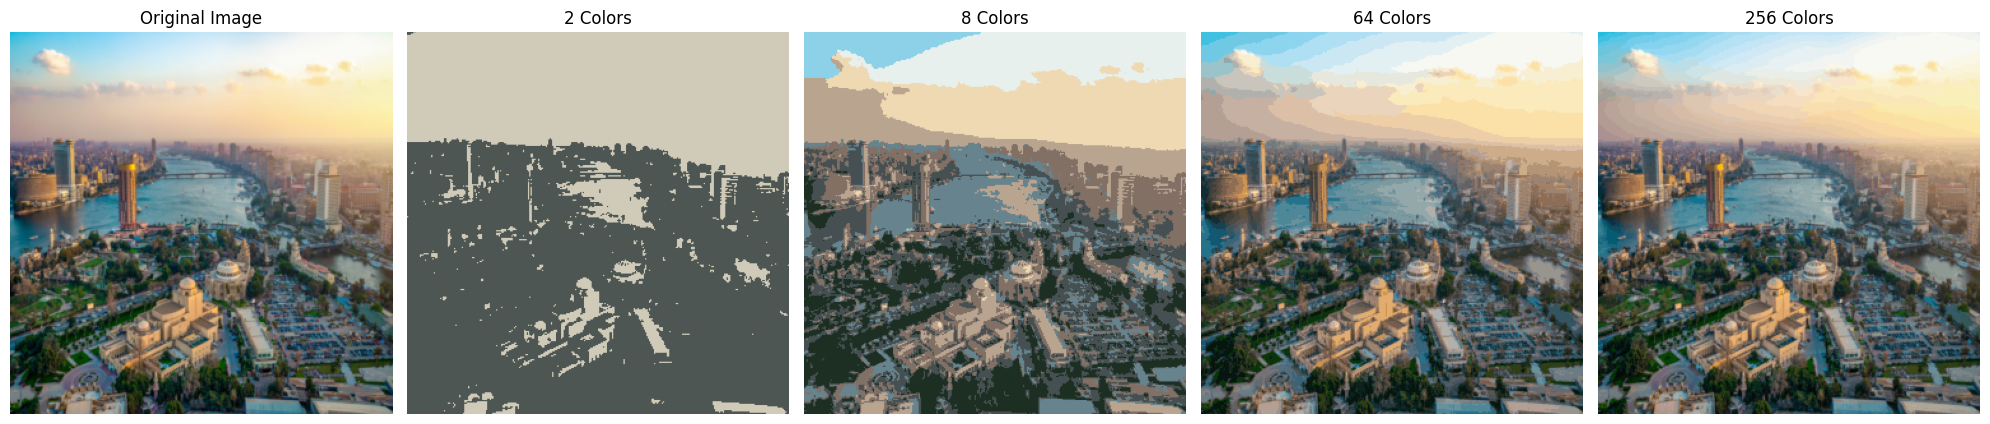

In [46]:
# Calculate the size of the original image in bytes
original_image_size = image.nbytes  # Assuming 'image' is your original image

# Calculate the size of the resized image in bytes
resized_image_size = image_resized.nbytes

# Display the original and compressed images, and calculate their sizes
fig, axes = plt.subplots(1, len(colors_list) + 1, figsize=(20, 10))

# Original image
axes[0].imshow(image_resized)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Compressed images with different numbers of colors
for i, n_colors in enumerate(colors_list, start=1):
    axes[i].imshow(reconstructed_images[n_colors])
    axes[i].set_title(f'{n_colors} Colors')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [47]:
# Calculate the size of the resized image in bytes
resized_image_size = image_resized.nbytes

# Convert sizes to kilobytes (KB) and megabytes (MB)
resized_image_size_kb = resized_image_size / 1024
resized_image_size_mb = resized_image_size_kb / 1024

# Display the sizes in KB and MB
print(f"Full colored image size: {resized_image_size_kb:.2f} KB or {resized_image_size_mb:.2f} MB")

for n_colors in colors_list:
    # Calculate the size of the compressed image data
    # Each pixel is assigned to one of the 'n_colors' clusters, typically represented as a label
    compressed_size_bytes = n_colors * 8 * 3 + len(pixels)
    compressed_size_kb = compressed_size_bytes / 1024
    compressed_size_mb = compressed_size_kb / 1024

    print(f"Compressed image size with {n_colors} colors: {compressed_size_kb:.2f} KB or {compressed_size_mb:.2f} MB")


Full colored image size: 2109.38 KB or 2.06 MB
Compressed image size with 2 colors: 87.94 KB or 0.09 MB
Compressed image size with 8 colors: 88.08 KB or 0.09 MB
Compressed image size with 64 colors: 89.39 KB or 0.09 MB
Compressed image size with 256 colors: 93.89 KB or 0.09 MB


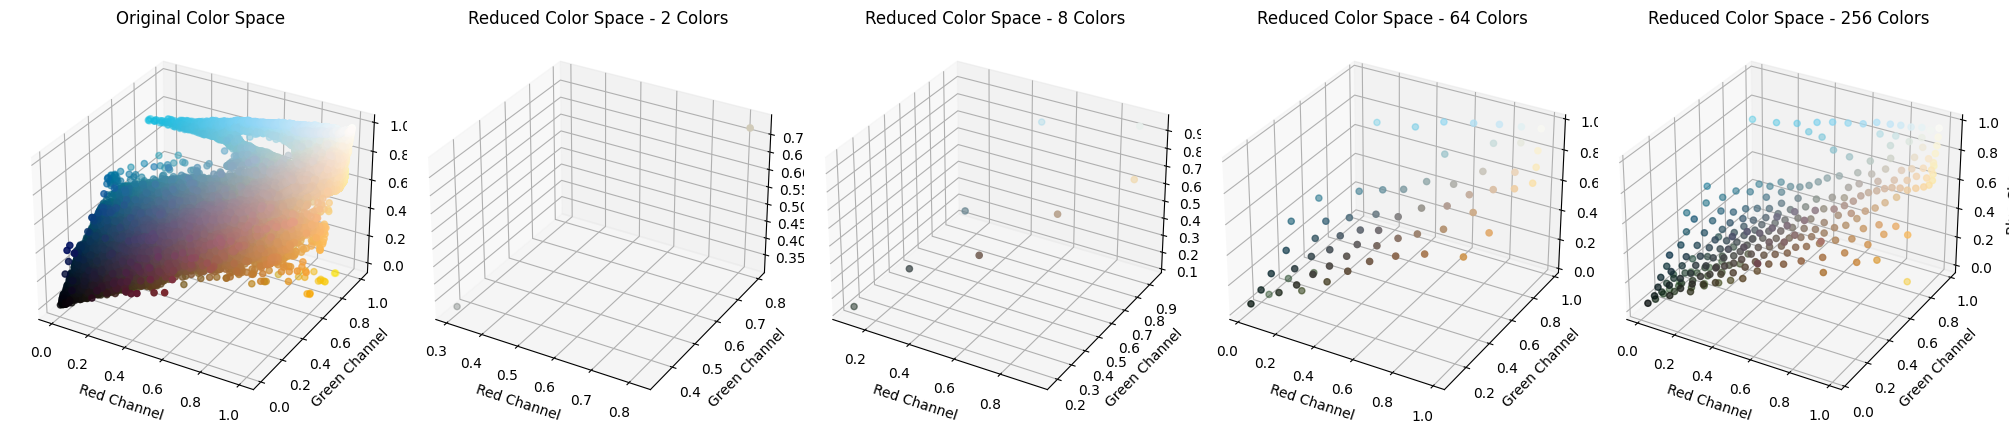

In [48]:
from mpl_toolkits.mplot3d import Axes3D

# Function to plot color space
def plot_color_space(ax, image_pixels, title):
    # Plot each point with the color it represents
    ax.scatter(image_pixels[:, 0], image_pixels[:, 1], image_pixels[:, 2], c=image_pixels, marker='o')
    ax.set_title(title)
    ax.set_xlabel('Red Channel')
    ax.set_ylabel('Green Channel')
    ax.set_zlabel('Blue Channel')

# Create subplots
fig = plt.figure(figsize=(20, 10))

# Plot original color space
ax_original = fig.add_subplot(1, 5, 1, projection='3d')
plot_color_space(ax_original, pixels, 'Original Color Space')

# Plot reduced color spaces for each number of colors
for i, n_colors in enumerate(colors_list, start=2):
    ax_reduced = fig.add_subplot(1, 5, i, projection='3d')
    # For the reduced color space, we only want to plot the unique colors (cluster centers)
    unique_colors = np.unique(reconstructed_images[n_colors].reshape(-1, 3), axis=0)
    plot_color_space(ax_reduced, unique_colors, f'Reduced Color Space - {n_colors} Colors')

plt.tight_layout()
plt.show()


In [49]:
# Convert sizes to kilobytes (KB) and megabytes (MB)
def convert_size(size_bytes):
    size_kb = size_bytes / 1024
    size_mb = size_kb / 1024
    return size_kb, size_mb

# Original and PCA compressed image sizes
original_size_bytes = image2.nbytes
pca_size_bytes = image_reconstructed.nbytes
original_size_kb, original_size_mb = convert_size(original_size_bytes)
pca_size_kb, pca_size_mb = convert_size(pca_size_bytes)

# Display the original and PCA compressed sizes in KB and MB
print(f"Original Image Size: {original_size_kb:.2f} KB or {original_size_mb:.2f} MB")
print(f"PCA Compressed Size: {pca_size_kb:.2f} KB or {pca_size_mb:.2f} MB (Reduction Ratio: {pca_size_bytes / original_size_bytes:.2f})")

# Existing KMeans size calculation code
for n_colors in colors_list:
    compressed_size_bytes = n_colors * 8 * 3 + len(pixels)
    compressed_size_kb, compressed_size_mb = convert_size(compressed_size_bytes)

    # Display the KMeans compressed size and compare with PCA
    print(f"Compressed image size with {n_colors} colors: {compressed_size_kb:.2f} KB or {compressed_size_mb:.2f} MB")
    print(f"Reduction Ratio (KMeans {n_colors} colors vs PCA): {compressed_size_bytes / pca_size_bytes:.2f}")


Original Image Size: 34356.71 KB or 33.55 MB
PCA Compressed Size: 2109.38 KB or 2.06 MB (Reduction Ratio: 0.06)
Compressed image size with 2 colors: 87.94 KB or 0.09 MB
Reduction Ratio (KMeans 2 colors vs PCA): 0.04
Compressed image size with 8 colors: 88.08 KB or 0.09 MB
Reduction Ratio (KMeans 8 colors vs PCA): 0.04
Compressed image size with 64 colors: 89.39 KB or 0.09 MB
Reduction Ratio (KMeans 64 colors vs PCA): 0.04
Compressed image size with 256 colors: 93.89 KB or 0.09 MB
Reduction Ratio (KMeans 256 colors vs PCA): 0.04


Based on both models performances and image sizes, we conclude that Kmeans clustering is more effective for our use case and in compressing images.

The results show a significant reduction in image size when using both PCA and KMeans for compression. The original image size is 33.55 MB, which is substantially reduced to 2.06 MB with PCA, achieving a reduction ratio of 0.06. This indicates that the PCA-compressed image is only 6% of the size of the original image, demonstrating a high level of compression.

For KMeans compression, the size reduction is also notable, especially considering the number of colors used. With only 2 colors, the image size is reduced to 0.09 MB, which is even smaller than the PCA-compressed size. This trend continues as the number of colors increases (8, 64, 256), with the image size remaining around 0.09 MB. Remarkably, the reduction ratio compared to PCA is consistently 0.04 across all color levels, indicating that KMeans is more efficient than PCA in terms of size reduction for this particular image and settings.